
# Ridge coefficients as a function of the L2 Regularization

A model that overfits learns the training data too well, capturing both the
underlying patterns and the noise in the data. However, when applied to unseen
data, the learned associations may not hold. We normally detect this when we
apply our trained predictions to the test data and see the statistical
performance drop significantly compared to the training data.

One way to overcome overfitting is through regularization, which can be done by
penalizing large weights (coefficients) in linear models, forcing the model to
shrink all coefficients. Regularization reduces a model's reliance on specific
information obtained from the training samples.

This example illustrates how L2 regularization in a
:class:`~sklearn.linear_model.Ridge` regression affects a model's performance by
adding a penalty term to the loss that increases with the coefficients
$\beta$.

The regularized loss function is given by: $\mathcal{L}(X, y, \beta) =
\| y - X \beta \|^{2}_{2} + \alpha \| \beta \|^{2}_{2}$

where $X$ is the input data, $y$ is the target variable,
$\beta$ is the vector of coefficients associated with the features, and
$\alpha$ is the regularization strength.

The regularized loss function aims to balance the trade-off between accurately
predicting the training set and to prevent overfitting.

In this regularized loss, the left-hand side (e.g. $\|y -
X\beta\|^{2}_{2}$) measures the squared difference between the actual target
variable, $y$, and the predicted values. Minimizing this term alone could
lead to overfitting, as the model may become too complex and sensitive to noise
in the training data.

To address overfitting, Ridge regularization adds a constraint, called a penalty
term, ($\alpha \| \beta\|^{2}_{2}$) to the loss function. This penalty
term is the sum of the squares of the model's coefficients, multiplied by the
regularization strength $\alpha$. By introducing this constraint, Ridge
regularization discourages any single coefficient $\beta_{i}$ from taking
an excessively large value and encourages smaller and more evenly distributed
coefficients. Higher values of $\alpha$ force the coefficients towards
zero. However, an excessively high $\alpha$ can result in an underfit
model that fails to capture important patterns in the data.

Therefore, the regularized loss function combines the prediction accuracy term
and the penalty term. By adjusting the regularization strength, practitioners
can fine-tune the degree of constraint imposed on the weights, training a model
capable of generalizing well to unseen data while avoiding overfitting.


In [3]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

## Purpose of this example
For the purpose of showing how Ridge regularization works, we will create a
non-noisy data set. Then we will train a regularized model on a range of
regularization strengths ($\alpha$) and plot how the trained
coefficients and the mean squared error between those and the original values
behave as functions of the regularization strength.

### Creating a non-noisy data set
We make a toy data set with 100 samples and 10 features, that's suitable to
detect regression. Out of the 10 features, 8 are informative and contribute to
the regression, while the remaining 2 features do not have any effect on the
target variable (their true coefficients are 0). Please note that in this
example the data is non-noisy, hence we can expect our regression model to
recover exactly the true coefficients w.



In [5]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=100, n_features=10, n_informative=8, coef=True, random_state=1
)

# Obtain the true coefficients
print(f"The true coefficient of this regression problem are:\n{w}")

The true coefficient of this regression problem are:
[38.32634568 88.49665188  0.         29.75747153  0.         19.08699432
 25.44381023 38.69892343 49.28808734 71.75949622]


### Training the Ridge Regressor
We use :class:`~sklearn.linear_model.Ridge`, a linear model with L2
regularization. We train several models, each with a different value for the
model parameter `alpha`, which is a positive constant that multiplies the
penalty term, controlling the regularization strength. For each trained model
we then compute the error between the true coefficients `w` and the
coefficients found by the model `clf`. We store the identified coefficients
and the calculated errors for the corresponding coefficients in lists, which
makes it convenient for us to plot them.



In [7]:
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

# Generate values for `alpha` that are evenly distributed on a logarithmic scale
alphas = np.logspace(-3, 4, 200)
coefs = []
errors_coefs = []

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a).fit(X, y)
    coefs.append(clf.coef_)
    errors_coefs.append(mean_squared_error(clf.coef_, w))

### Plotting trained Coefficients and Mean Squared Errors
We now plot the 10 different regularized coefficients as a function of the
regularization parameter `alpha` where each color represents a different
coefficient.

On the right-hand-side, we plot how the errors of the coefficients from the
estimator change as a function of regularization.



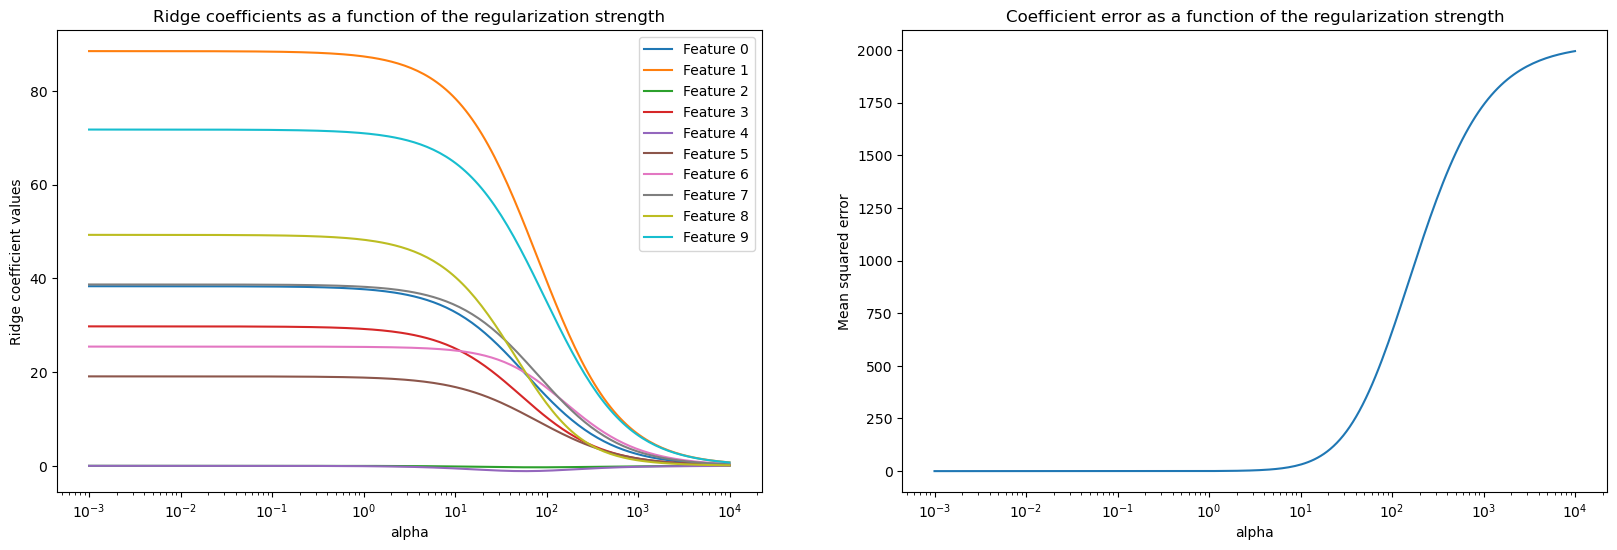

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

alphas = pd.Index(alphas, name="alpha")
coefs = pd.DataFrame(coefs, index=alphas, columns=[f"Feature {i}" for i in range(10)])
errors = pd.Series(errors_coefs, index=alphas, name="Mean squared error")

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

coefs.plot(
    ax=axs[0],
    logx=True,
    title="Ridge coefficients as a function of the regularization strength",
)
axs[0].set_ylabel("Ridge coefficient values")
errors.plot(
    ax=axs[1],
    logx=True,
    title="Coefficient error as a function of the regularization strength",
)
_ = axs[1].set_ylabel("Mean squared error")

### Interpreting the plots
The plot on the left-hand side shows how the regularization strength (`alpha`)
affects the Ridge regression coefficients. Smaller values of `alpha` (weak
regularization), allow the coefficients to closely resemble the true
coefficients (`w`) used to generate the data set. This is because no
additional noise was added to our artificial data set. As `alpha` increases,
the coefficients shrink towards zero, gradually reducing the impact of the
features that were formerly more significant.

The right-hand side plot shows the mean squared error (MSE) between the
coefficients found by the model and the true coefficients (`w`). It provides a
measure that relates to how exact our ridge model is in comparison to the true
generative model. A low error means that it found coefficients closer to the
ones of the true generative model. In this case, since our toy data set was
non-noisy, we can see that the least regularized model retrieves coefficients
closest to the true coefficients (`w`) (error is close to 0).

When `alpha` is small, the model captures the intricate details of the
training data, whether those were caused by noise or by actual information. As
`alpha` increases, the highest coefficients shrink more rapidly, rendering
their corresponding features less influential in the training process. This
can enhance a model's ability to generalize to unseen data (if there was a lot
of noise to capture), but it also poses the risk of losing performance if the
regularization becomes too strong compared to the amount of noise the data
contained (as in this example).

In real-world scenarios where data typically includes noise, selecting an
appropriate `alpha` value becomes crucial in striking a balance between an
overfitting and an underfitting model.

Here, we saw that :class:`~sklearn.linear_model.Ridge` adds a penalty to the
coefficients to fight overfitting. Another problem that occurs is linked to
the presence of outliers in the training dataset. An outlier is a data point
that differs significantly from other observations. Concretely, these outliers
impact the left-hand side term of the loss function that we showed earlier.
Some other linear models are formulated to be robust to outliers such as the
:class:`~sklearn.linear_model.HuberRegressor`. You can learn more about it in
the `sphx_glr_auto_examples_linear_model_plot_huber_vs_ridge.py` example.

